In [93]:
import pickle, os

In [110]:
folder_name = '04-10-2020_09-28'
test_name = 'gp_4b'
fold_num = 3

dir = os.getcwd() + '/Plots/' + folder_name + '/' + test_name + '/cs_data.json'
filehandler = open(dir, 'rb')
dt = pickle.load(filehandler)

In [144]:
# Lists all keys in order of success per call rate (descending).
num_zero_cust = 0

for key in dt[fold_num]['GC'].keys():
    if dt[fold_num]['GC'][key]['n_rows'] == 0:
        num_zero_cust += 1
    print(key, dt[fold_num]['GC'][key]['n_rows'])
    print("\n")

print("Number of customer segments where we have zero customers are: ", num_zero_cust)

(('tertiary', 'unknown'), ('student', 'retired'), ('married',), ('no',), ('yes',), ('yes',), 'balance >= -10000 & balance <= 60', 'age >= 26 & age <= 59') 1


(('secondary', 'primary'), ('student', 'retired'), ('married',), ('no',), ('yes',), ('no',), 'balance >= 1579 & balance <= 105000', 'age >= 60 & age <= 87') 2


(('tertiary', 'unknown'), ('student', 'retired'), ('married',), ('no',), ('no',), ('yes',), 'balance >= 1579 & balance <= 105000', 'age >= 60 & age <= 87') 10


(('tertiary', 'unknown'), ('unemployed', 'admin.', 'management', 'self-employed', 'technician', 'unknown', 'services', 'housemaid', 'blue-collar', 'entrepreneur'), ('single', 'divorced'), ('no',), ('no',), ('yes',), 'balance >= -10000 & balance <= 60', 'age >= 60 & age <= 87') 5


(('secondary', 'primary'), ('unemployed', 'admin.', 'management', 'self-employed', 'technician', 'unknown', 'services', 'housemaid', 'blue-collar', 'entrepreneur'), ('married',), ('no',), ('yes',), ('no',), 'balance >= 61 & balance <= 15

In [112]:
# Sorting the keys in descending order of the number of customers in the segment.
sorted_dt = {k: v for k, v in sorted(dt[fold_num]['GC'].items(), key=lambda item: item[1]['n_rows'], reverse = True)}

In [113]:
all_cs_sorted = list(sorted_dt.keys())

print(all_cs_sorted[0], sorted_dt[all_cs_sorted[0]]['n_rows'])
print(all_cs_sorted[1], sorted_dt[all_cs_sorted[1]]['n_rows'])
print(all_cs_sorted[2], sorted_dt[all_cs_sorted[2]]['n_rows'])

(('secondary', 'primary'), ('unemployed', 'admin.', 'management', 'self-employed', 'technician', 'unknown', 'services', 'housemaid', 'blue-collar', 'entrepreneur'), ('married',), ('no',), ('no',), ('yes',), 'balance >= 61 & balance <= 1578', 'age >= 26 & age <= 59') 3883
(('secondary', 'primary'), ('unemployed', 'admin.', 'management', 'self-employed', 'technician', 'unknown', 'services', 'housemaid', 'blue-collar', 'entrepreneur'), ('single', 'divorced'), ('no',), ('no',), ('yes',), 'balance >= 61 & balance <= 1578', 'age >= 26 & age <= 59') 2282
(('secondary', 'primary'), ('unemployed', 'admin.', 'management', 'self-employed', 'technician', 'unknown', 'services', 'housemaid', 'blue-collar', 'entrepreneur'), ('married',), ('no',), ('no',), ('no',), 'balance >= 61 & balance <= 1578', 'age >= 26 & age <= 59') 2042


In [134]:
# This was used in paper for showing the difference with convex hull approach.
key_to_plot = all_cs_sorted[13]
segment = dt[fold_num]['GC'][key_to_plot]

In [156]:
key_to_plot

(('secondary', 'primary'),
 ('unemployed',
  'admin.',
  'management',
  'self-employed',
  'technician',
  'unknown',
  'services',
  'housemaid',
  'blue-collar',
  'entrepreneur'),
 ('married',),
 ('no',),
 ('no',),
 ('no',),
 'balance >= -10000 & balance <= 60',
 'age >= 26 & age <= 59')

In [136]:
segment

{'max_loc': 0,
 'best_rate': 0,
 'overall_rate': 0.01694915254237288,
 'n_rows': 874,
 'results': [{'succ': 24, 'total_calls': 874, 'expected': 0.02745995423340961},
  {'succ': 32, 'total_calls': 1484, 'expected': 0.0215633423180593},
  {'succ': 41, 'total_calls': 1845, 'expected': 0.022222222222222223},
  {'succ': 42, 'total_calls': 2093, 'expected': 0.020066889632107024},
  {'succ': 44, 'total_calls': 2249, 'expected': 0.01956425077812361},
  {'succ': 46, 'total_calls': 2369, 'expected': 0.019417475728155338},
  {'succ': 47, 'total_calls': 2455, 'expected': 0.019144602851323828},
  {'succ': 47, 'total_calls': 2522, 'expected': 0.018636003172085646},
  {'succ': 47, 'total_calls': 2575, 'expected': 0.01825242718446602},
  {'succ': 47, 'total_calls': 2619, 'expected': 0.01794578083237877},
  {'succ': 47, 'total_calls': 2654, 'expected': 0.017709118311981915},
  {'succ': 48, 'total_calls': 2683, 'expected': 0.017890421170331718},
  {'succ': 48, 'total_calls': 2707, 'expected': 0.01773180

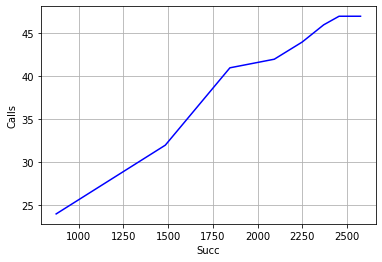

[874, 1484, 1845, 2093, 2249, 2369, 2455, 2522, 2575] [24, 32, 41, 42, 44, 46, 47, 47, 47]


In [135]:
import matplotlib.pyplot as plt

x = []
y = []

j = 0
for point in segment['results']:
    if j > 8:
        break
    x.append(point['total_calls'])
    y.append(point['succ'])
    j += 1

plt.ylabel("Calls")
plt.xlabel("Succ")
plt.plot(x, y, label='Test', linewidth=1.5, color = 'blue')
plt.grid(True)
plt.show()

print(x, y)

In [139]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

points = [(0,0), (1484, 32), (1845, 41), (2093, 42) ,(2249, 44) ,(2369, 46), (2455, 47),]

# for i in range(0, len(x)):
#     points.append((x[i], y[i]))
    
hull = ConvexHull(points)
hull.simplices

array([[6, 0],
       [2, 0],
       [2, 6]], dtype=int32)

In [145]:
i = 0
for key in dt[fold_num]['GC'].keys():
    if dt[fold_num]['GC'][key]['n_rows'] != 0:
        print(i)
    i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
193
194
202
209
213
216
217
219
220
227
228
229
232
240
243
245
251
252
257
267
268
274
276
288
293
310
315
327
342
346
348
349
350
351
354
356
357
359
360
361
362
363
364
365
366
367
368
369
370
371
372
377
378
379
384
385
389
390
393
397
408
409
410
416
424
425
427
428
429
434
446
448
450
451
453
459
465
466
471
472
477
478
479
484
490
495
496
49

960


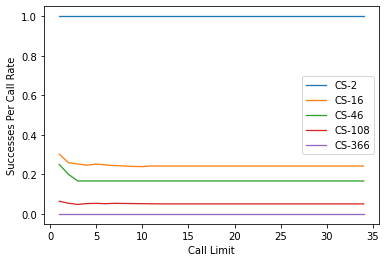

In [174]:
# This was used in paper for showing various 

all_cs = list(dt[fold_num]['GC'].keys())
print(len(all_cs))

key1 = all_cs[1]
key2 = all_cs[15]
key3 = all_cs[45]
key4 = all_cs[107]
key5 = all_cs[365]

import matplotlib.pyplot as plt

plt.ylabel("Successes Per Call Rate")
plt.xlabel("Call Limit")

calls = [i for i in range (1,35)]

succ = [point['expected'] for point in dt[fold_num]['GC'][key1]['results']]
plt.plot(calls, succ, label='CS-2', linewidth=1.3)

succ = [point['expected'] for point in dt[fold_num]['GC'][key2]['results']]
plt.plot(calls, succ, label='CS-16', linewidth=1.3)

succ = [point['expected'] for point in dt[fold_num]['GC'][key3]['results']]
plt.plot(calls, succ, label='CS-46', linewidth=1.3)

succ = [point['expected'] for point in dt[fold_num]['GC'][key4]['results']]
plt.plot(calls, succ, label='CS-108', linewidth=1.3)

succ = [point['expected'] for point in dt[fold_num]['GC'][key5]['results']]
plt.plot(calls, succ, label='CS-366', linewidth=1.3)

plt.grid(False)
plt.legend()
plt.savefig('all.pdf')

In [180]:
key1
# dt[fold_num]['GC'][key1]['results'][-1]

(('secondary', 'primary'),
 ('student', 'retired'),
 ('married',),
 ('no',),
 ('yes',),
 ('no',),
 'balance >= 1579 & balance <= 105000',
 'age >= 60 & age <= 87')

In [181]:
key2
# dt[fold_num]['GC'][key2]['results'][-1]

(('secondary', 'primary'),
 ('student', 'retired'),
 ('single', 'divorced'),
 ('no',),
 ('no',),
 ('no',),
 'balance >= 61 & balance <= 1578',
 'age >= 18 & age <= 25')

In [182]:
key3
# dt[fold_num]['GC'][key3]['results'][-1]

(('tertiary', 'unknown'),
 ('unemployed',
  'admin.',
  'management',
  'self-employed',
  'technician',
  'unknown',
  'services',
  'housemaid',
  'blue-collar',
  'entrepreneur'),
 ('single', 'divorced'),
 ('no',),
 ('yes',),
 ('yes',),
 'balance >= -10000 & balance <= 60',
 'age >= 18 & age <= 25')

In [183]:
key4
# dt[fold_num]['GC'][key4]['results'][-1]

(('tertiary', 'unknown'),
 ('unemployed',
  'admin.',
  'management',
  'self-employed',
  'technician',
  'unknown',
  'services',
  'housemaid',
  'blue-collar',
  'entrepreneur'),
 ('single', 'divorced'),
 ('no',),
 ('yes',),
 ('no',),
 'balance >= 61 & balance <= 1578',
 'age >= 26 & age <= 59')

In [184]:
key5
# dt[fold_num]['GC'][key5]['results'][-1]

(('secondary', 'primary'),
 ('student', 'retired'),
 ('married',),
 ('yes',),
 ('no',),
 ('yes',),
 'balance >= -10000 & balance <= 60',
 'age >= 26 & age <= 59')